<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/sofiaborgato/Bioinformatic_project.git'
import tarfile
import os
import sys
import os
import numpy as np
import string
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

fatal: destination path 'Bioinformatic_project' already exists and is not an empty directory.


In [2]:

# open file
file = tarfile.open('./Bioinformatic_project/total_aligned.tar.xz') 
# extracting file
file.extractall('./Bioinformatic_project')
  
file.close()
path='./Bioinformatic_project'
for file_name in os.listdir(path):
  print(file_name)


afri_alignment.csv
data.tar.xz
total_aligned.tar.xz
us_alignment.csv
en2_alignment.csv
bra_alignment.csv
en1_alignment.csv
.git
ori_alignment.csv
original_covid_genome.fasta
total_aligned.csv


In [3]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('./Bioinformatic_project/total_aligned.csv')

In [5]:
data

,Full sequence,ORF1ab,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10,label
0,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
1,----------------TTCCCAGGTAACAAACCAACCAACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
2,-------------------------------------AACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
3,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
4,------GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,----------------------------------------TTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,5
5996,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTT

In [6]:
data.drop('Full sequence',axis='columns',inplace=True)

In [7]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2,shuffle=True,stratify=data['label'])
train, val = train_test_split(train, test_size=0.2,shuffle=True,stratify=train['label'])

In [8]:
indicator_column_names = data.columns.drop('label')
indicator_column_names

Index(['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N',
       'ORF10'],
      dtype='object')

In [9]:
batch_size = 30
train_ds = df_to_dataset(train, shuffle = False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
feature_columns = []
n_features = 1000
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, data[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

In [10]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [11]:
model = tf.keras.Sequential([                          
 feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(6)
])

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
128/128 - 4s - loss: 1.7799 - accuracy: 0.2919 - val_loss: 1.7698 - val_accuracy: 0.3729
Epoch 2/50
128/128 - 2s - loss: 1.7574 - accuracy: 0.4831 - val_loss: 1.7471 - val_accuracy: 0.5896
Epoch 3/50
128/128 - 2s - loss: 1.7324 - accuracy: 0.6617 - val_loss: 1.7201 - val_accuracy: 0.7323
Epoch 4/50
128/128 - 2s - loss: 1.7012 - accuracy: 0.7904 - val_loss: 1.6871 - val_accuracy: 0.8208
Epoch 5/50
128/128 - 2s - loss: 1.6635 - accuracy: 0.8557 - val_loss: 1.6473 - val_accuracy: 0.8792
Epoch 6/50
128/128 - 2s - loss: 1.6188 - accuracy: 0.9076 - val_loss: 1.5994 - val_accuracy: 0.9177
Epoch 7/50
128/128 - 2s - loss: 1.5644 - accuracy: 0.9365 - val_loss: 1.5426 - val_accuracy: 0.9385
Epoch 8/50
128/128 - 2s - loss: 1.5019 - accuracy: 0.9560 - val_loss: 1.4779 - val_accuracy: 0.9479
Epoch 9/50
128/128 - 2s - loss: 1.4

<Figure size 432x288 with 0 Axes>

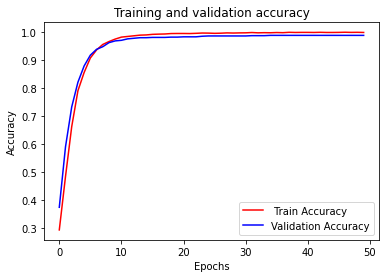

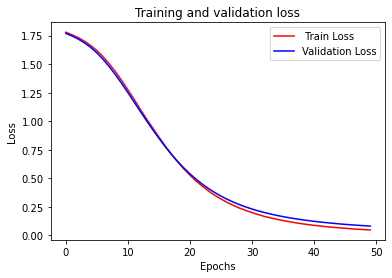

<Figure size 432x288 with 0 Axes>

In [12]:
num_epochs = 50
bs = 32
lr = 1e-5
opt = tf.keras.optimizers.Adam(learning_rate=lr)
#train_ds = df_to_dataset(train_x,train_y,batch_size = bs)
#val_ds = df_to_dataset(val_x,val_y,batch_size = bs)


model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds, batch_size = bs, verbose=2)


import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#Result Visulization
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend([" Train Accuracy", "Validation Accuracy"])

plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend([" Train Loss", "Validation Loss"])

plt.figure()

In [13]:
model.fit(train_ds,validation_data=val_ds, epochs=20)
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

Epoch 1/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0438 - accuracy: 0.9995 - val_loss: 0.0778 - val_accuracy: 0.9885
Epoch 2/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0406 - accuracy: 0.9995 - val_loss: 0.0749 - val_accuracy: 0.9885
Epoch 3/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0388 - accuracy: 0.9992 - val_loss: 0.0722 - val_accuracy: 0.9885
Epoch 4/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0363 - accuracy: 0.9997 - val_loss: 0.0696 - val_accuracy: 0.9885
Epoch 5/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0338 - accuracy: 0.9995 - val_loss: 0.0673 - val_accuracy: 0.9885
Epoch 6/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0323 - accuracy: 0.9992 - val_loss: 0.0650 - val_accuracy: 0.9885
Epoch 7/20
128/128 [==============================] - 2s 15ms/step - loss: 0.0301 - accuracy: 0.9992 - val_loss: 0.0630 - val_accuracy: 0.9885